# SI 618: Data Manipulation and Analysis
## 08 - Clustering
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

### <font color="magenta">Q1: Record your music preferences</font>

Fill in your music preferences on https://docs.google.com/spreadsheets/d/1KY8tBiiSeehMDxXc4GU_mOoD8MRnUVkUtinadNJEgrU/edit?usp=sharing

Values should range from 1 to 10.  1=no way; 10=the best.  Please fill in a value for each column.

We will be downloading the completed sheet to use as data for this class.


![](resources/clustering/Slide01.png)

![](resources/clustering/Slide02.png)

![](resources/clustering/Slide03.png)

![](resources/clustering/Slide01.png)

![](resources/clustering/Slide04.png)

![](resources/clustering/Slide07.png)

![](resources/clustering/Slide09.png)

![](resources/clustering/Slide10.png)

![](resources/clustering/Slide11.png)

![](resources/clustering/Slide12.png)

![](resources/clustering/Slide13.png)

![](resources/clustering/Slide14.png)

![](resources/clustering/Slide15.png)

![](resources/clustering/Slide16.png)

![](resources/clustering/Slide17.png)

![](resources/clustering/Slide18.png)

![](resources/clustering/Slide19.png)

![](resources/clustering/Slide20.png)

![](resources/clustering/Slide21.png)

![](resources/clustering/Slide22.png)

![](resources/clustering/Slide23.png)

![](resources/clustering/Slide24.png)

![](resources/clustering/Slide25.png)

## NOW: Download music_wn2019.csv from Slack

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns

In [3]:
music = pd.read_csv('data/music_wn2019.csv')

In [6]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
0,Chris,6,9,4,2,6.0,1,8,5,6,9,5.0
1,Scott,4,9,2,2,6.0,4,9,6,8,7,9.0
2,Shiyan,7,10,5,1,1.0,2,5,4,6,3,3.0
3,Yujia,4,6,5,6,1.0,10,7,7,7,5,4.0
4,Sagnik,4,3,7,5,8.0,7,9,4,8,9,9.0


In [7]:
music = music.dropna() # Clustering doesn't like NaNs
music_indexed_by_name = music.set_index('Name')

In [8]:
music_indexed_by_name.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
Name,,,,,,,,,,,
Chris,6,9,4,2,6.0,1,8,5,6,9,5.0
Scott,4,9,2,2,6.0,4,9,6,8,7,9.0
Shiyan,7,10,5,1,1.0,2,5,4,6,3,3.0
Yujia,4,6,5,6,1.0,10,7,7,7,5,4.0
Sagnik,4,3,7,5,8.0,7,9,4,8,9,9.0


In [9]:
model = AgglomerativeClustering(n_clusters=3) # we can make up the value for clusters
model.fit_predict(music_indexed_by_name)

array([1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [12]:
music_indexed_by_name['cluster'] = model.labels_

### Plot Hierarachical Clustering Dendrogram 
The following function plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.

It was writte by Mathew Kallada and modified by Chris Teplovs.
It is licensed under the BSD clause.

In [13]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



In [14]:
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(music_indexed_by_name)
music_indexed_by_name['cluster'] = model.labels_

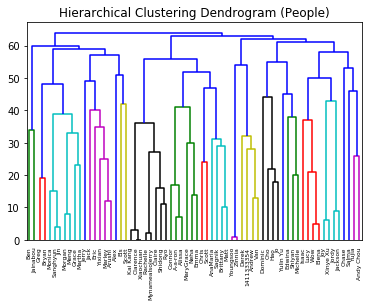

In [19]:
plt.title('Hierarchical Clustering Dendrogram (People)')
plot_dendrogram(model,labels=music_indexed_by_name.index.values)
plt.xticks(rotation=90)
plt.savefig('musicprefs.pdf',format='pdf')
plt.show()

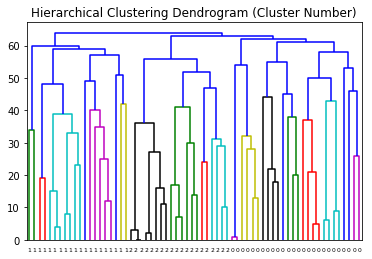

In [16]:
plt.title('Hierarchical Clustering Dendrogram (Cluster Number)')
plot_dendrogram(model,labels=model.labels_)
plt.xticks(rotation=0)
plt.show()

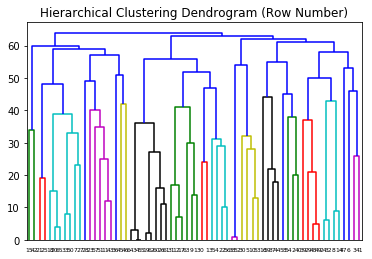

In [22]:
plt.title('Hierarchical Clustering Dendrogram (Row Number)')
plot_dendrogram(model)
plt.xticks(rotation=0)
plt.show()

### <font color="magenta">Q2: What's the "best" choice for the number of clusters?  What are your options? How would you choose? </font>

The best choice, for me, would be 11 clusters. There are many options: you could do # of people or # of genres, or anything between those and 0. I would chose 11 because there are 11 different genres; we could then group people by their genre preference.

### <font color="magenta">Q3: Describe the characteristics of each of the clusters (i.e. use groupby() and then describe()).  Use complete sentences to interpret your results

In [40]:
music_indexed_by_name.groupby('cluster').describe().stack().round(3)

Blues  Classical  Country  Electronic    Folk  Hip Hop  \
cluster                                                                  
0       count  26.000     26.000   26.000      26.000  26.000   26.000   
        mean    6.038      7.500    3.846       5.000   4.692    5.423   
        std     2.271      1.817    2.603       2.592   2.526    2.656   
        min     1.000      4.000    1.000       1.000   1.000    1.000   
        25%     4.250      6.000    1.250       3.000   3.000    4.000   
        50%     6.500      8.000    3.000       5.000   5.000    5.000   
        75%     7.000      8.750    5.750       7.000   6.750    7.750   
        max    10.000     11.000    9.000       9.000   9.000   10.000   
1       count  20.000     20.000   20.000      20.000  20.000   20.000   
        mean    3.500      3.800    3.350       6.550   4.050    7.600   
        std     2.236      1.824    2.641       2.645   1.905    1.818   
        min     1.000      1.000    1.000       1.000   1.000    4.000   
        25%     1.000      2.750    1.000       5.750   3.000    6.000   
        50%     4.000      4.000    2.500       7.000   4.000    8.000   
        75%     5.000      5.000    5.250       8.250   5.250    9.000   
        max     8.000      7.000    9.000      10.000   7.000   10.000   
2       count  20.000     20.000   20.000      20.000  20.000   20.000   
        mean    6.550      7.100    5.250       6.250   6.550    6.600   
        std     1.638      2.049    1.970       2.489   1.191    1.957   
        min     4.000      3.000    2.000       2.000   4.000    1.000   
        25%     5.750      5.750    4.000       4.750   6.000    6.000   
        50%     7.000      8.000    5.500       6.500   6.000    7.000   
        75%     7.250      8.250    7.000       8.000   8.000    8.000   
        max    10.000     10.000    8.000      10.000   8.000    9.000   

                 Jazz   Latin     Pop    Rock  Soul-R-and-B  
cluster                                                      
0       count  26.000  26.000  26.000  26.000        26.000  
        mean    5.885   4.000   5.692   6.192         4.846  
        std     1.986   2.020   2.619   2.546         2.327  
        min     2.000   1.000   1.000   3.000         1.000  
        25%     5.000   3.000   3.500   4.000         3.000  
        50%     6.000   4.000   6.000   6.000         4.500  
        75%     7.000   4.750   7.750   8.000         6.750  
        max     9.000   9.000  10.000  10.000         9.000  
1       count  20.000  20.000  20.000  20.000        20.000  
        mean    5.750   4.250   7.050   6.150         6.700  
        std     2.314   1.743   2.212   2.412         2.080  
        min     1.000   2.000   2.000   1.000         2.000  
        25%     4.000   3.000   6.000   5.000         6.000  
        50%     6.500   4.000   8.000   7.000         7.000  
        75%     7.250   5.250   9.000   8.000         8.000  
        max     9.000   8.000   9.000   9.000        10.000  
2       count  20.000  20.000  20.000  20.000        20.000  
        mean    7.550   6.700   7.450   8.250         7.800  
        std     1.099   1.490   1.538   1.020         1.322  
        min     6.000   4.000   4.000   7.000         5.000  
        25%     7.000   5.750   6.000   7.750         7.000  
        50%     7.000   7.000   8.000   8.000         8.000  
        75%     8.250   8.000   8.250   9.000         9.000  
        max    10.000   9.000  10.000  10.000        10.000

Both clusters 1 and 2 have the same number of people; cluster 0 has 6 more than the other two clusters. There is also someone in cluster 0 that **REALLY** likes classical music.

# K-Means Clustering

![](resources/clustering/Slide26.png)

![](resources/clustering/Slide27.png)

![](resources/clustering/Slide28.png)

![](resources/clustering/Slide31.png)

![](resources/clustering/Slide32.png)

![](resources/clustering/Slide33.png)

![](resources/clustering/Slide34.png)

![](resources/clustering/Slide36.png)

![](resources/clustering/Slide37.png)

In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
kmeans = KMeans(n_clusters=3) # start with 3 clusters
kmeans.fit(music_indexed_by_name)
print("Labels:")
print(kmeans.labels_)

Labels:
[0 0 0 1 2 0 1 1 0 2 0 1 2 2 0 1 1 2 2 2 1 1 0 2 0 1 2 1 2 1 0 2 1 1 2 0 1
 0 0 2 1 2 1 1 0 1 1 0 2 1 1 1 0 0 0 2 2 2 0 1 2 2 2 2 2 2]


In [43]:
data = music_indexed_by_name.copy()

And now let's join the labels with the original dataframe:

In [44]:
data_joined = pd.concat([pd.DataFrame(kmeans.labels_).reset_index(),music.reset_index()],axis=1).drop('index',axis=1)

In [45]:
data_joined.head()

,0,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
0,0,Chris,6,9,4,2,6.0,1,8,5,6,9,5.0
1,0,Scott,4,9,2,2,6.0,4,9,6,8,7,9.0
2,0,Shiyan,7,10,5,1,1.0,2,5,4,6,3,3.0
3,1,Yujia,4,6,5,6,1.0,10,7,7,7,5,4.0
4,2,Sagnik,4,3,7,5,8.0,7,9,4,8,9,9.0


## Picking K – How many clusters?

A number of clustering methods, such as k-means, assumes the parameter k (#clusters) is known in advance, which is often not the case in practice. A number of techniques exist for determining the number of clusters in a dataset. See [this Wikipedia page](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for a detailed discussion.

In this section, we focus on four of the approaches:

1. Educated guessing
	* What are some criteria you could use?
2. Rule of thumb
3. The Elbow Method
4. The Silhouette Approach

Let us see if all the methods listed above will be able to recover the true number of clusters.

### Rule of Thumb

By rule of thumb, we could potentially choose the number of clusters as simply


$$ k \approx \sqrt{n/2} $$

where $n$ is the number of observations.

### The Elbow Method (Scree Plot)

Here, we plot the percentage of variance explained as a function of the number of clusters.

As we increase *k*, this percentage will naturally increase. Where we see diminishing returns to increasing *k* is a good place to stop, which corresponds to the "elbow" in the graph. This is a bit of an art, since the elbow is not unambiguous.


### The Silhouette Method

The silhouette coefficient is a measure of how closely a particular datum is matched to data and how loosely it is matched to data of that neighboring cluster.

You'd therefore expect that a datum that's a good match for its cluster to have a silhouette of 1, and a data that's a poor match to have a score of -1.

We can find the average silhouette of the data for particular values of *k*, and choose the maximum.


In [46]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

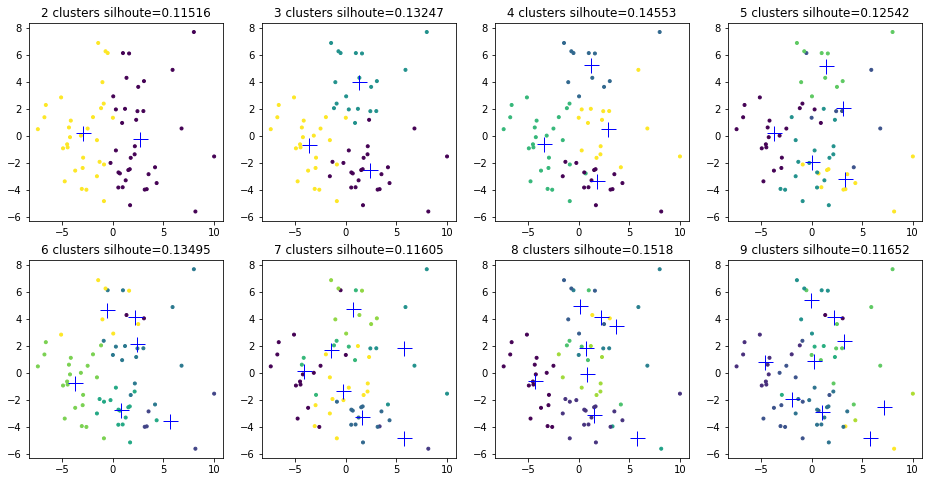

In [47]:
pca = PCA(n_components=2).fit(data)
data2d = pca.transform(data)

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(data)
    scores.append(kmean.score(data))
    n_clusters.append(i)
    pred = kmean.predict(data)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

### Example: Use these three methods (rule of thumb, elbow, and silhouette) to determine the ideal number of clusters for a k-means clustering of our music preferences data.</font>


Hints:

* Use inertia, the within-cluster sum of squares as the criterion for the elbow method. This is [available](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) in your `k_means` result as `k_means.inertia_`.
* The silhouette score can be computed with [sklearn.metrics.silhouette\_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score). `silhouette_score` takes two arguments: `data` and `k_means.labels_`.

In [48]:
np.sqrt(len(data)/2)

5.744562646538029

(1, 15.65)

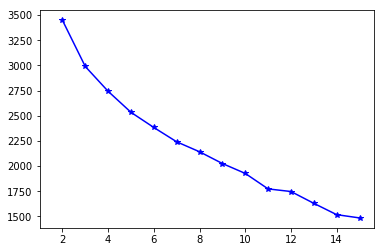

In [132]:
from sklearn import metrics

cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

(1, 15.65)

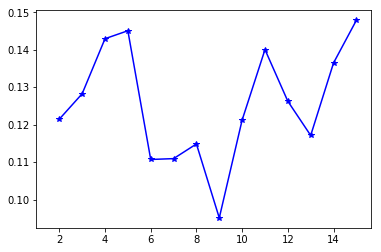

In [69]:
cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_))

# kIdx = np.argmax(cost)
fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

What did you get? Did they all agree?

# BREAK

## Applying what we just learned to a Pokemon dataset

In [70]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### <font color="magenta">Q4: Study and describe the dataset at https://www.kaggle.com/alopez247/pokemon</a>
The data file has been provided in today's zip file as data/pokemon_alopez247.csv.

Provide a detailed description of the dataset in your own words.  Include items such as the shape of the dataset (i.e. the number of rows and columns), the number of continuous variables, the number of categorical variables, and so on.  Provide information about means, medians, etc. Provide graphical representations of the data (e.g. histograms, bar charts, scatterplots, etc.) where appropriate.

In [71]:
pokemon = pd.read_csv('data/pokemon_alopez247.csv',index_col='Name')

In [72]:
pokemon.head()

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [76]:
print(f'Shape of dataset: {pokemon.shape}')

Shape of dataset: (721, 22)


In [83]:
print(len(pokemon.describe().columns))
pokemon.describe()

13


,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


The dataset has 721 rows and 22 columns. 13 of these columns are continuous variables; the remaining 9 are categorical variables. 

The average total points for all the pokemon is ~418, and the averages for HP, Attack, Defense, Sp_Atk, Sp_Def, and Speed are ~68, ~75, ~71, ~69, ~69, and ~65, respectively. The average probability of being male is 0.55. The average height is 1.14 meters. The average weight is 56.77 kg.

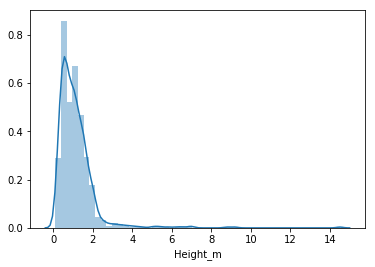

In [93]:
sns.distplot(pokemon.Height_m)

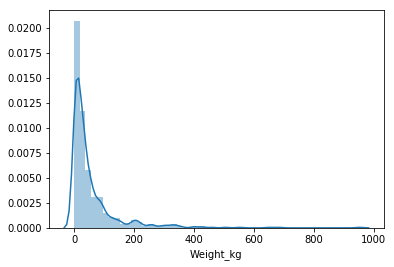

In [94]:
sns.distplot(pokemon.Weight_kg)

### <font color="magenta">Q5: Create dummy variables for categorical variables.  </font>
We will discuss why you need to use ```drop_first=True``` argument to ```pd.get_dummies``` in class.  What is the shape of the resulting DataFrame?


In [105]:
pokemon_dummies = pd.get_dummies(pokemon, drop_first = True)
pokemon_dummies.shape

(721, 98)

In [106]:
pokemon_dummies.columns

Index(['Number', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Generation', 'isLegendary', 'hasGender', 'Pr_Male',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Type_1_Dark', 'Type_1_Dragon', 'Type_1_Electric', 'Type_1_Fairy',
       'Type_1_Fighting', 'Type_1_Fire', 'Type_1_Flying', 'Type_1_Ghost',
       'Type_1_Grass', 'Type_1_Ground', 'Type_1_Ice', 'Type_1_Normal',
       'Type_1_Poison', 'Type_1_Psychic', 'Type_1_Rock', 'Type_1_Steel',
       'Type_1_Water', 'Type_2_Dark', 'Type_2_Dragon', 'Type_2_Electric',
       'Type_2_Fairy', 'Type_2_Fighting', 'Type_2_Fire', 'Type_2_Flying',
       'Type_2_Ghost', 'Type_2_Grass', 'Type_2_Ground', 'Type_2_Ice',
       'Type_2_Normal', 'Type_2_Poison', 'Type_2_Psychic', 'Type_2_Rock',
       'Type_2_Steel', 'Type_2_Water', 'Color_Blue', 'Color_Brown',
       'Color_Green', 'Color_Grey', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_White', 'Color_Yellow', 'Egg_Group_1_Bug', 'Egg

### <font color="magenta">Q6: Fit a 3-cluster agglomerative clustering model to the pokemon data (with dummy variables).</a>
Provide a graphical representation of the results and save the figure as a PDF file (Hint: use plt.savefig(...)).  Provide an interpretation of your results

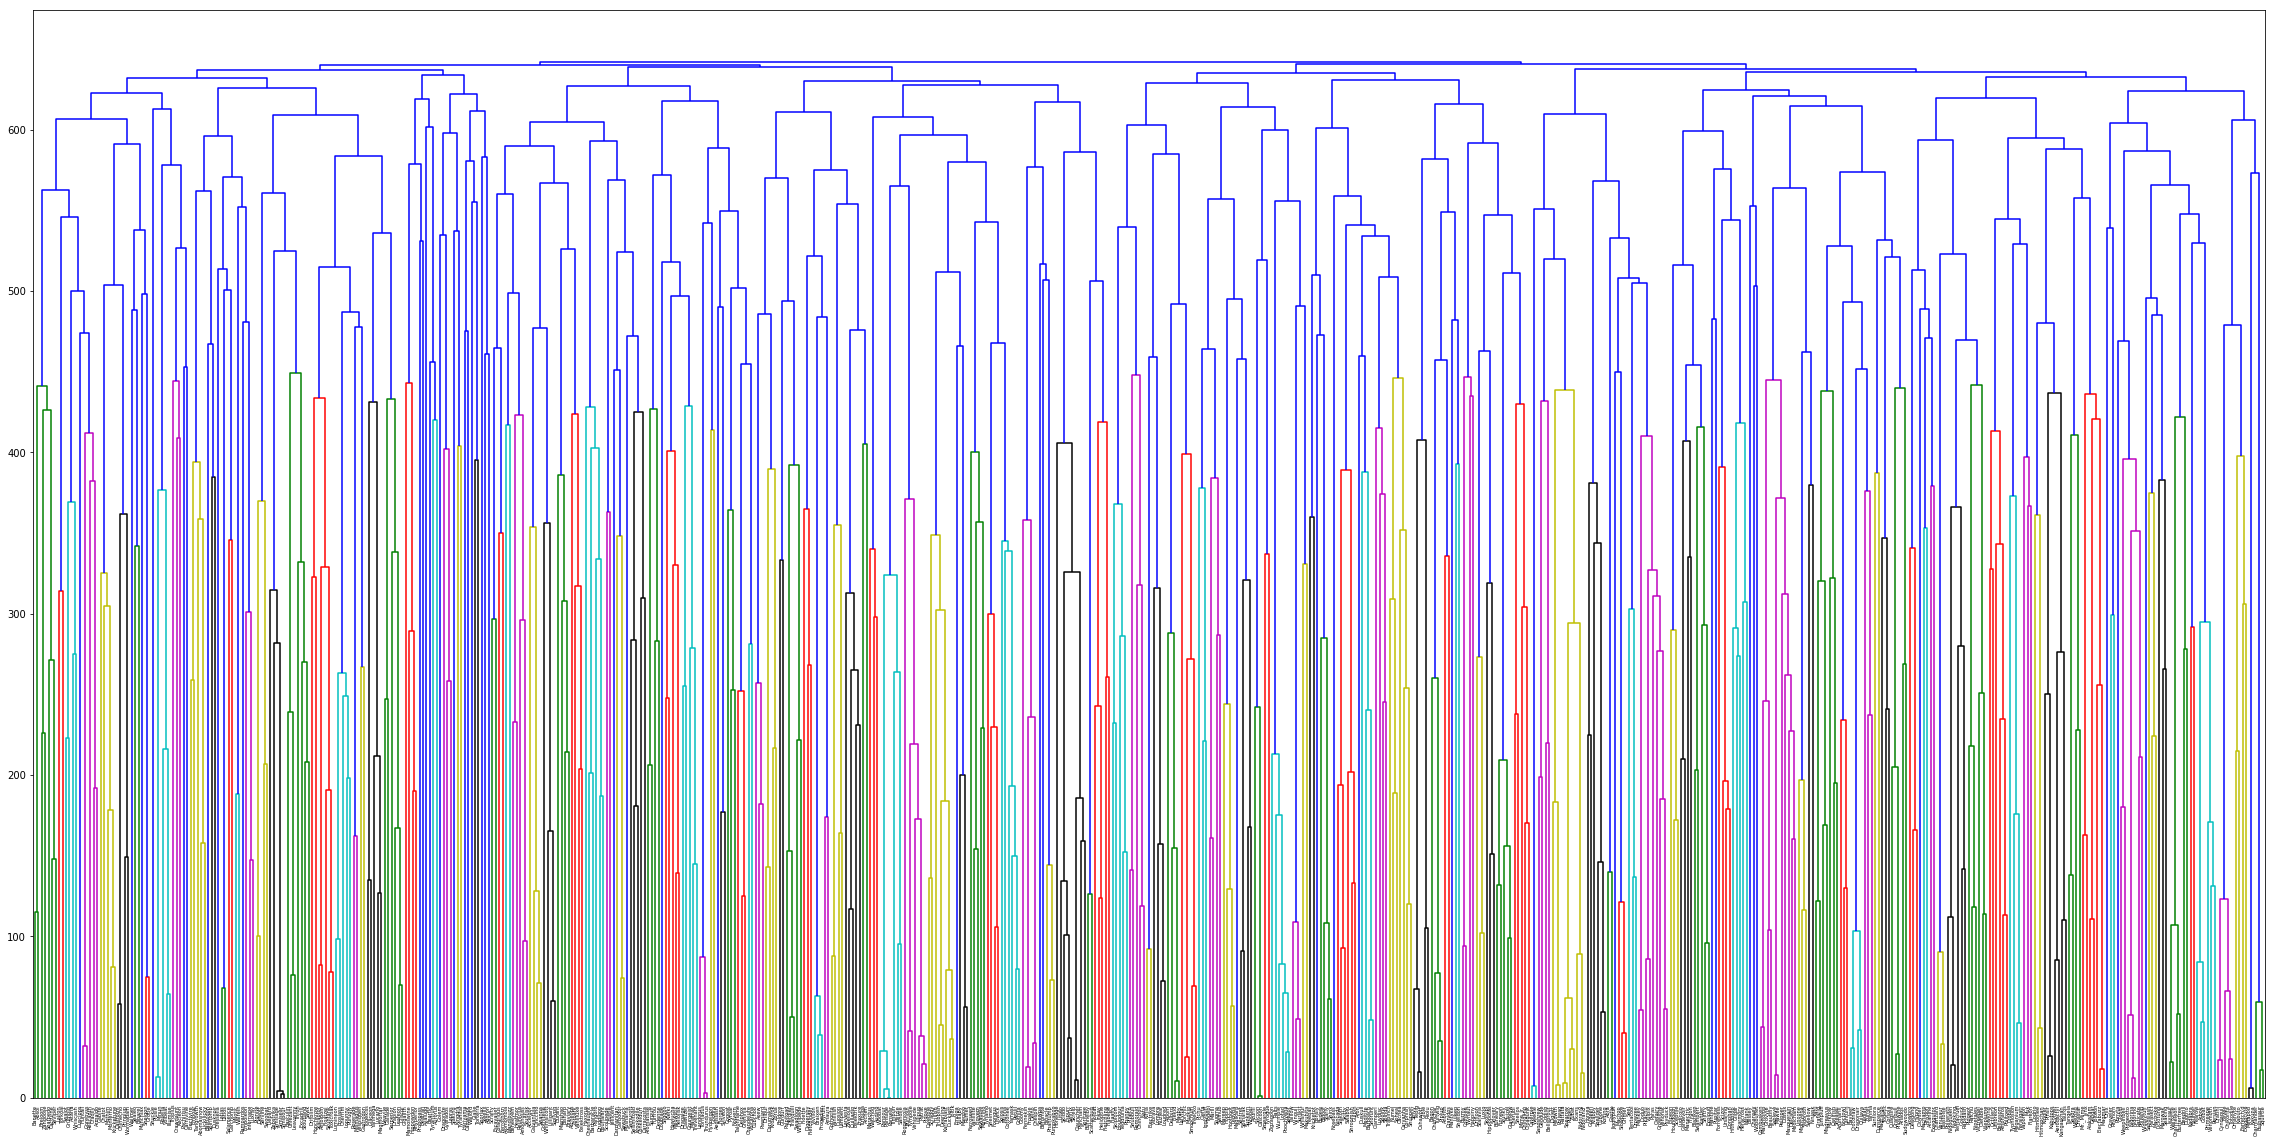

In [122]:
pokemon_dummies_clean = pokemon_dummies.dropna().copy()
model = AgglomerativeClustering(n_clusters=3) # we can make up the value for clusters
model.fit_predict(pokemon_dummies_clean)
pokemon_dummies_clean['cluster'] = model.labels_
plt.figure(figsize = (40, 20))
plt.xticks(rotation = 90)
plot_dendrogram(model, labels = pokemon_dummies_clean.index.values)
plt.savefig('pokemon_agg.pdf', format = 'pdf')

In [124]:
pokemon_dummies_clean.groupby('cluster').describe().stack().round(3)

Number    Total       HP   Attack  Defense   Sp_Atk   Sp_Def  \
cluster                                                                        
0       count  311.000  311.000  311.000  311.000  311.000  311.000  311.000   
        mean   524.505  439.283   73.032   81.373   75.347   71.656   71.576   
        std    130.395   89.934   23.260   28.140   28.830   26.335   25.541   
        min     76.000  200.000   20.000   10.000   32.000   10.000   25.000   
        25%    433.500  369.500   59.000   60.000   55.000   53.000   55.000   
        50%    544.000  468.000   70.000   80.000   70.000   69.000   67.000   
        75%    627.500  500.000   85.000  100.000   87.000   92.000   85.000   
        max    715.000  670.000  170.000  165.000  230.000  145.000  230.000   
1       count  212.000  212.000  212.000  212.000  212.000  212.000  212.000   
        mean   126.623  415.877   67.901   73.953   69.401   67.278   68.599   
        std     85.976   82.690   28.578   24.411   25.618   25.664   23.167   
        min      1.000  195.000   10.000    5.000    5.000   20.000   20.000   
        25%     53.750  351.500   50.000   55.000   52.750   49.750   50.000   
        50%    111.500  425.000   65.000   75.000   65.000   65.000   70.000   
        75%    196.250  490.000   80.000   90.000   80.000   85.000   80.000   
        max    330.000  555.000  255.000  130.000  180.000  135.000  140.000   
2       count  121.000  121.000  121.000  121.000  121.000  121.000  121.000   
        mean   312.967  288.884   49.893   50.033   47.091   45.975   47.876   
        std     94.122   49.215   15.493   20.396   19.414   16.625   16.500   
        min    129.000  180.000   20.000    5.000    5.000   10.000   20.000   
        25%    238.000  250.000   40.000   35.000   35.000   35.000   37.000   
        50%    304.000  300.000   49.000   49.000   45.000   44.000   45.000   
        75%    399.000  330.000   60.000   64.000   53.000   60.000   55.000   
        max    501.000  375.000  100.000  125.000  135.000   85.000  120.000   

                 Speed  Generation  Pr_Male  ...  Body_Style_head_base  \
cluster                                      ...                         
0       count  311.000     311.000  311.000  ...               311.000   
        mean    66.299       4.646    0.553  ...                 0.058   
        std     26.676       1.094    0.205  ...                 0.234   
        min      5.000       1.000    0.000  ...                 0.000   
        25%     46.000       4.000    0.500  ...                 0.000   
        50%     65.000       5.000    0.500  ...                 0.000   
        75%     85.000       5.000    0.500  ...                 0.000   
        max    145.000       6.000    1.000  ...                 1.000   
1       count  212.000     212.000  212.000  ...               212.000   
        mean    68.745       1.495    0.562  ...                 0.028   
        std     25.987       0.699    0.208  ...                 0.166   
        min     15.000       1.000    0.000  ...                 0.000   
        25%     50.000       1.000    0.500  ...                 0.000   
        50%     67.500       1.000    0.500  ...                 0.000   
        75%     90.000       2.000    0.562  ...                 0.000   
        max    160.000       3.000    1.000  ...                 1.000   
2       count  121.000     121.000  121.000  ...               121.000   
        mean    48.017       3.033    0.537  ...                 0.017   
        std     20.859       0.826    0.170  ...                 0.128   
        min     10.000       1.000    0.000  ...                 0.000   
        25%     31.000       2.000    0.500  ...                 0.000   
        50%     45.000       3.000    0.500  ...                 0.000   
        75%     65.000       4.000    0.500  ...                 0.000   
        max     97.000       5.000    1.000  ...                 1.000   

          

The mean total attribute points for cluster 2 is much lower than those of cluster 0 and 1. As well, all individual attribute means are lower for cluster 2 when compared to cluster 0 and 1.

### <font color="magenta">Q7: Fit a series of k-means models to the Pokemon dataset.</font>

**Your values of k should range from 2 to 9.**

Select the optimal number of *k*.

Use the four methods suggested above (i.e. educated guess, rule of thumb, elbow method, and silhouette.  Provide plots for the elbow and silhouette methods.  Include 2-D plots of the centroids and individual data points for a reasonable range of *k* values (we suggest 2 to 9).  What, in your opinion, is the best choice for *k*?  What are the characteristics of each of the clusters in your solution (i.e. what characteristics do the members of each cluster have in common?)


In [133]:
k1 = 3
k2 = np.sqrt(len(pokemon_dummies_clean) / 2)

kmeans = KMeans(n_clusters = 3) # start with 3 clusters for educated guess
kmeans.fit(music_indexed_by_name)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

(1, 8.3)

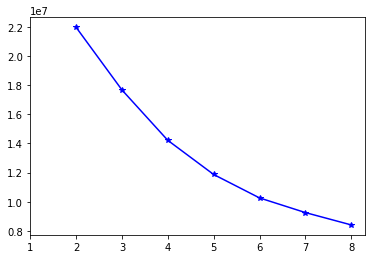

In [135]:
cost = []
for k in range(2, 9):
    k_means = KMeans(init='k-means++', n_clusters = k, n_init = 10)
    k_means.fit(pokemon_dummies_clean)
    cost.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(2, 9), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])
k3 = 4

(1, 8.3)

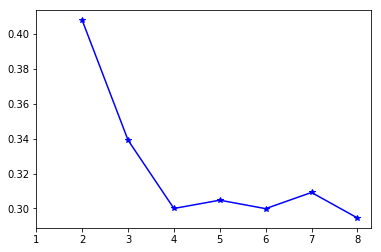

In [137]:
cost = []
for k in range(2, 9):
    k_means = KMeans(init = 'k-means++', n_clusters = k, n_init = 10)
    k_means.fit(pokemon_dummies_clean)
    cost.append(metrics.silhouette_score(pokemon_dummies_clean, k_means.labels_))

# kIdx = np.argmax(cost)
fig, ax = plt.subplots()
plt.plot(range(2, 9), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])
k4 = 4

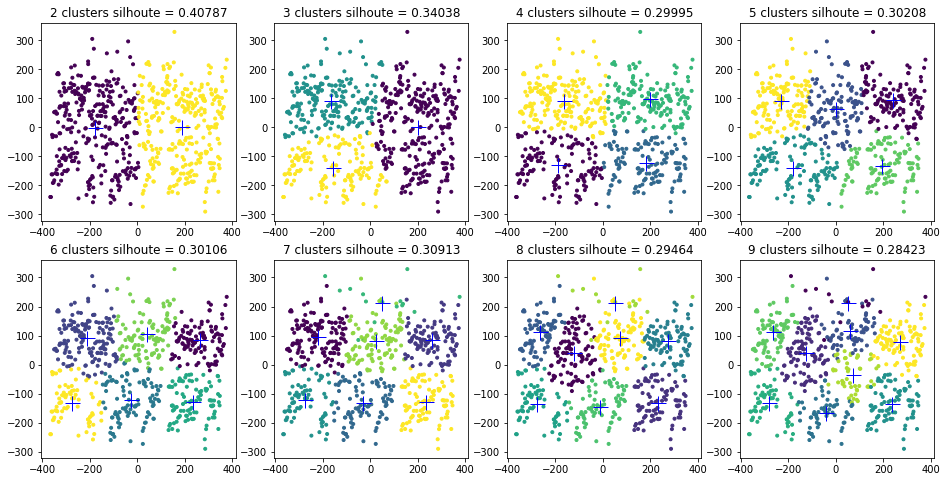

In [139]:
pca = PCA(n_components = 2).fit(pokemon_dummies_clean)
data2d = pca.transform(pokemon_dummies_clean)

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(pokemon_dummies_clean)
    scores.append(kmean.score(pokemon_dummies_clean))
    n_clusters.append(i)
    pred = kmean.predict(pokemon_dummies_clean)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters silhoute = {np.round(silhouette_score(pokemon_dummies_clean, pred), decimals = 5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c = pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

Based off the methods discussed, it seems k of around 4 or 5 is the optimal number of clusters. From the rule of thumb, a k-value of 18 is given, but does not seem reasonable. Both the elbow method and the silhoette method give a k of around 4 or 5. The centroid graph technically says 2 clusters is the best, but given how dispersed the data is, clustering is difficult.

## END OF NOTEBOOK
Please remember to submit your notebook in both .HTML and .IPYNB formats via Canvas.